# Zillow house sales time series analysis

For this project, I am looking at zillow house sales price data for **Jacksonville, FL**to do  from January 2000 to July 2023. I will first collect the data for Jacksonville from all the counties in USA and then clean it. The aim of the project is to **identify the 5 zip codes that are going to see the most increase in sale prices** in the next three years. I will model the prices using ARIMA and use that to predict the future prices. 

For the exploratory data analysis, I have plotted the Number of cities in Jacksonville Metropilitan Area and number of zipcodes in them. I have also plotted the number of zip codes in each city that fit the budget constraint of in between 250K and 300K. I have also shown price change as a function of year since 2000. We will see that **zip code 32219 is expected to grow the most in Jacksonville by 34.03%.**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Reading the data.
df = pd.read_csv('zillow_new_data.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222052.680173,...,484345.046154,482936.939958,480955.192564,478744.251766,477613.884660,478401.567457,480558.518766,482993.086253,485617.076797,487831.135410
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,130236.993136,...,524721.196886,528538.259794,531632.971320,534333.624762,536596.459382,540647.092574,545952.467558,551647.261446,556597.033709,560839.453835
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,112454.710733,...,282570.117109,281580.127792,280012.895775,278208.108820,276661.076658,275862.493458,275515.357485,275702.667750,276434.318999,277595.230857
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,98216.011661,...,433592.261724,432717.247161,431011.054874,430956.632678,431741.114608,434614.265819,436457.632686,440306.545141,446840.284062,456389.751405
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,112336.237577,...,273561.195519,273289.493977,272372.117263,270955.981449,269689.895929,269109.608036,269034.953294,269356.442517,270008.733793,270879.897294


In [3]:
# Collecting data for Jacksonville
duval = df[df['CountyName'] == 'Duval County']
clay = df[df['CountyName'] == 'Clay County']
baker = df[df['CountyName'] == 'Baker County']
nassau = df[df['CountyName'] == 'Nassau County']
st_johns = df[df['CountyName'] == 'St. Johns County']

jax = pd.concat([duval, clay, baker, st_johns, nassau], ignore_index=True)
jax

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,71871,242,32218,zip,FL,FL,Jacksonville,"Jacksonville, FL",Duval County,105190.721678,...,3.093896e+05,3.097768e+05,3.090698e+05,3.077814e+05,3.066148e+05,3.060205e+05,3.054271e+05,3.048719e+05,3.048515e+05,3.053114e+05
1,71864,297,32210,zip,FL,FL,Jacksonville,"Jacksonville, FL",Duval County,72833.359873,...,2.410875e+05,2.414310e+05,2.409394e+05,2.402002e+05,2.395244e+05,2.391066e+05,2.382978e+05,2.374267e+05,2.370045e+05,2.367933e+05
2,71895,346,32244,zip,FL,FL,Jacksonville,"Jacksonville, FL",Duval County,84461.194955,...,2.721977e+05,2.719385e+05,2.708173e+05,2.694173e+05,2.682069e+05,2.676063e+05,2.670422e+05,2.666454e+05,2.668865e+05,2.674090e+05
3,71897,597,32246,zip,FL,FL,Jacksonville,"Jacksonville, FL",Duval County,102674.368393,...,3.276930e+05,3.280526e+05,3.271082e+05,3.254164e+05,3.238826e+05,3.234438e+05,3.232007e+05,3.231160e+05,3.232173e+05,3.239784e+05
4,71902,627,32256,zip,FL,FL,Jacksonville,"Jacksonville, FL",Duval County,119075.828615,...,3.343678e+05,3.356302e+05,3.351884e+05,3.335752e+05,3.314264e+05,3.303972e+05,3.298664e+05,3.298449e+05,3.298940e+05,3.306983e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,62140,20717,11547,zip,NY,NY,Glenwood Landing,"New York-Newark-Jersey City, NY-NJ-PA",Nassau County,270504.140264,...,7.935735e+05,7.931924e+05,7.921145e+05,7.939756e+05,7.966070e+05,8.023658e+05,8.040756e+05,8.049755e+05,8.049012e+05,8.077259e+05
211,62159,21665,11569,zip,NY,NY,Point Lookout,"New York-Newark-Jersey City, NY-NJ-PA",Nassau County,406717.601029,...,1.167642e+06,1.166587e+06,1.162653e+06,1.152879e+06,1.144978e+06,1.142545e+06,1.143287e+06,1.144534e+06,1.142527e+06,1.145489e+06
212,62128,22569,11509,zip,NY,NY,Atlantic Beach,"New York-Newark-Jersey City, NY-NJ-PA",Nassau County,355586.584286,...,1.286440e+06,1.287410e+06,1.283761e+06,1.276788e+06,1.268766e+06,1.265510e+06,1.268259e+06,1.269952e+06,1.269469e+06,1.271518e+06
213,62141,22710,11548,zip,NY,NY,Greenvale,"New York-Newark-Jersey City, NY-NJ-PA",Nassau County,347749.536528,...,8.836061e+05,8.826084e+05,8.817631e+05,8.839005e+05,8.862365e+05,8.905241e+05,8.924816e+05,8.943300e+05,8.966438e+05,9.013279e+05


In [4]:
# Some counties were common to other states as well.
# Only want to use for Jacksonville, FL.
jax = jax[jax['State'] == 'FL']
del jax['StateName']
jax.head()

,RegionID,SizeRank,RegionName,RegionType,State,City,Metro,CountyName,2000-01-31,2000-02-29,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,71871,242,32218,zip,FL,Jacksonville,"Jacksonville, FL",Duval County,105190.721678,105336.100942,...,309389.631847,309776.765400,309069.818578,307781.409697,306614.841230,306020.531578,305427.101423,304871.911804,304851.467709,305311.394409
1,71864,297,32210,zip,FL,Jacksonville,"Jacksonville, FL",Duval County,72833.359873,72965.196354,...,241087.457540,241430.981558,240939.351352,240200.223907,239524.375955,239106.600929,238297.760598,237426.696862,237004.498781,236793.328217
2,71895,346,32244,zip,FL,Jacksonville,"Jacksonville, FL",Duval County,84461.194955,84652.118712,...,272197.744873,271938.524676,270817.306700,269417.288669,268206.935444,267606.291227,267042.234733,266645.425844,266886.493624,267408.969364
3,71897,597,32246,zip,FL,Jacksonville,"Jacksonville, FL",Duval County,102674.368393,102714.390967,...,327692.993716,328052.561298,327108.184846,325416.446549,323882.555069,323443.774664,323200.694919,323116.013925,323217.334575,323978.429144
4,71902,627,32256,zip,FL,Jacksonville,"Jacksonville, FL",Duval County,119075.828615,119299.362902,...,334367.844643,335630.168523,335188.358680,333575.155554,331426.388245,330397.164161,329866.428887,329844.896411,329893.972173,330698.304606


### Exploratory Data Analysis

Text(0, 0.5, 'Cities')

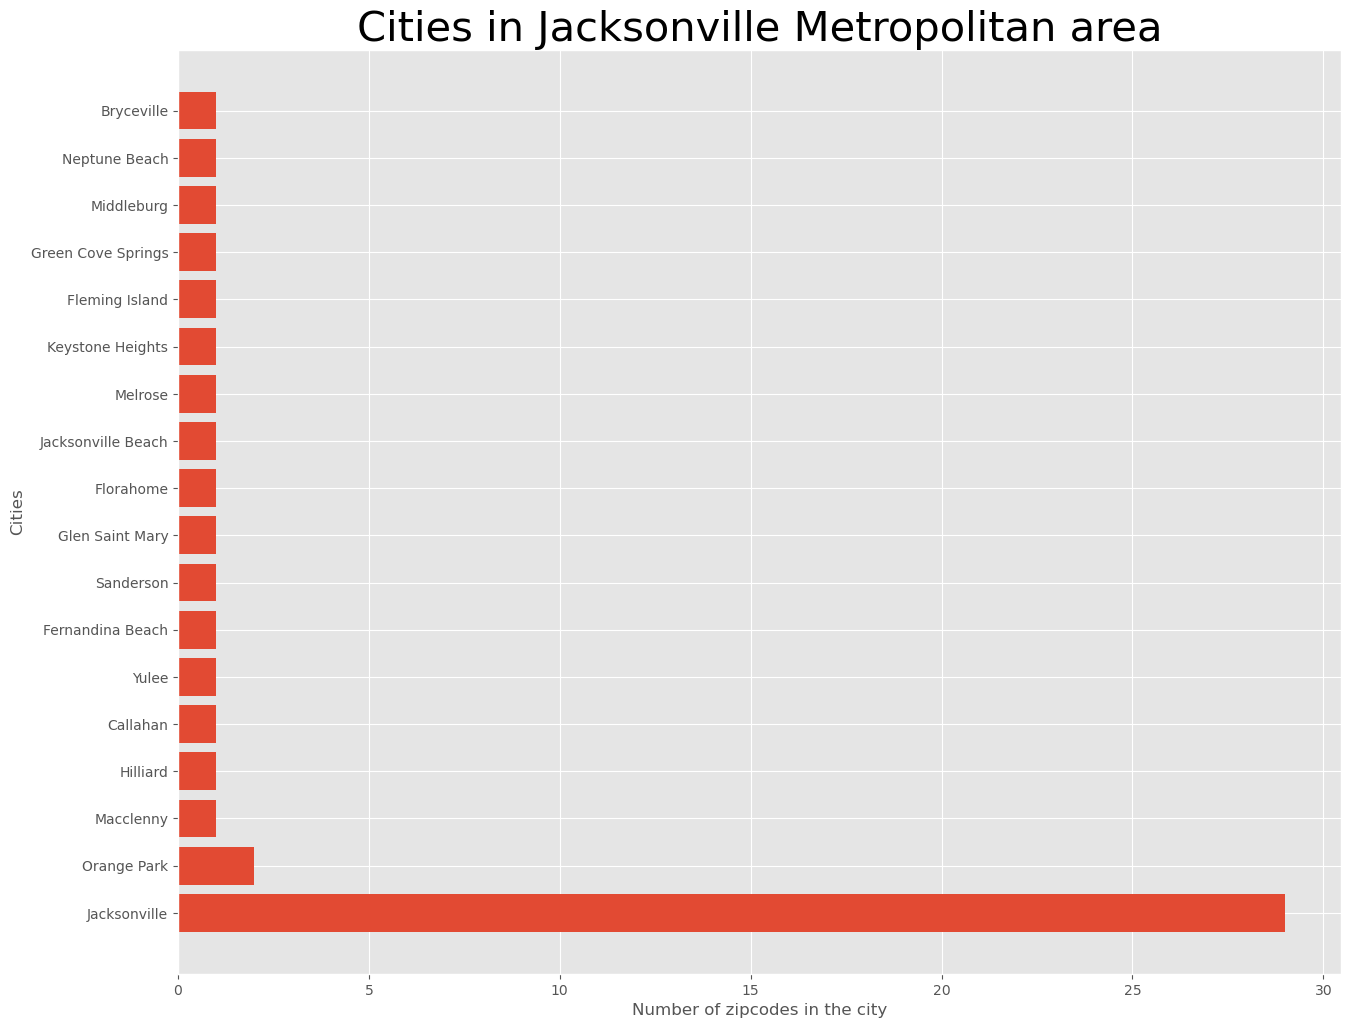

In [5]:
# Number of cities in Jacksonville Metropilitan Area.
# and number of zipcodes in them.
fig, ax = plt.subplots(figsize = (15,12))

y = [z for z in jax['City'].value_counts()]
x = [z for z in jax['City'].value_counts().keys()]
ax.barh(x,y)
ax.set_title("Cities in Jacksonville Metropolitan area", fontsize = 30)
ax.set_xlabel("Number of zipcodes in the city")
ax.set_ylabel("Cities")

In [6]:
# Zip codes that are in the budget of 250000 to 300000.
# Otherwise the zip codes list was becoming too long.
jax_budget = jax[(jax['2023-07-31'] <= 300000) & (jax['2023-07-31'] >= 250000)]

In [7]:
jax_budget_zips = [z for z in jax_budget['RegionName']]
jax_budget_zips

[32244, 32216, 32207, 32277, 32205, 32219, 32220, 32234, 32656, 32666, 32063]

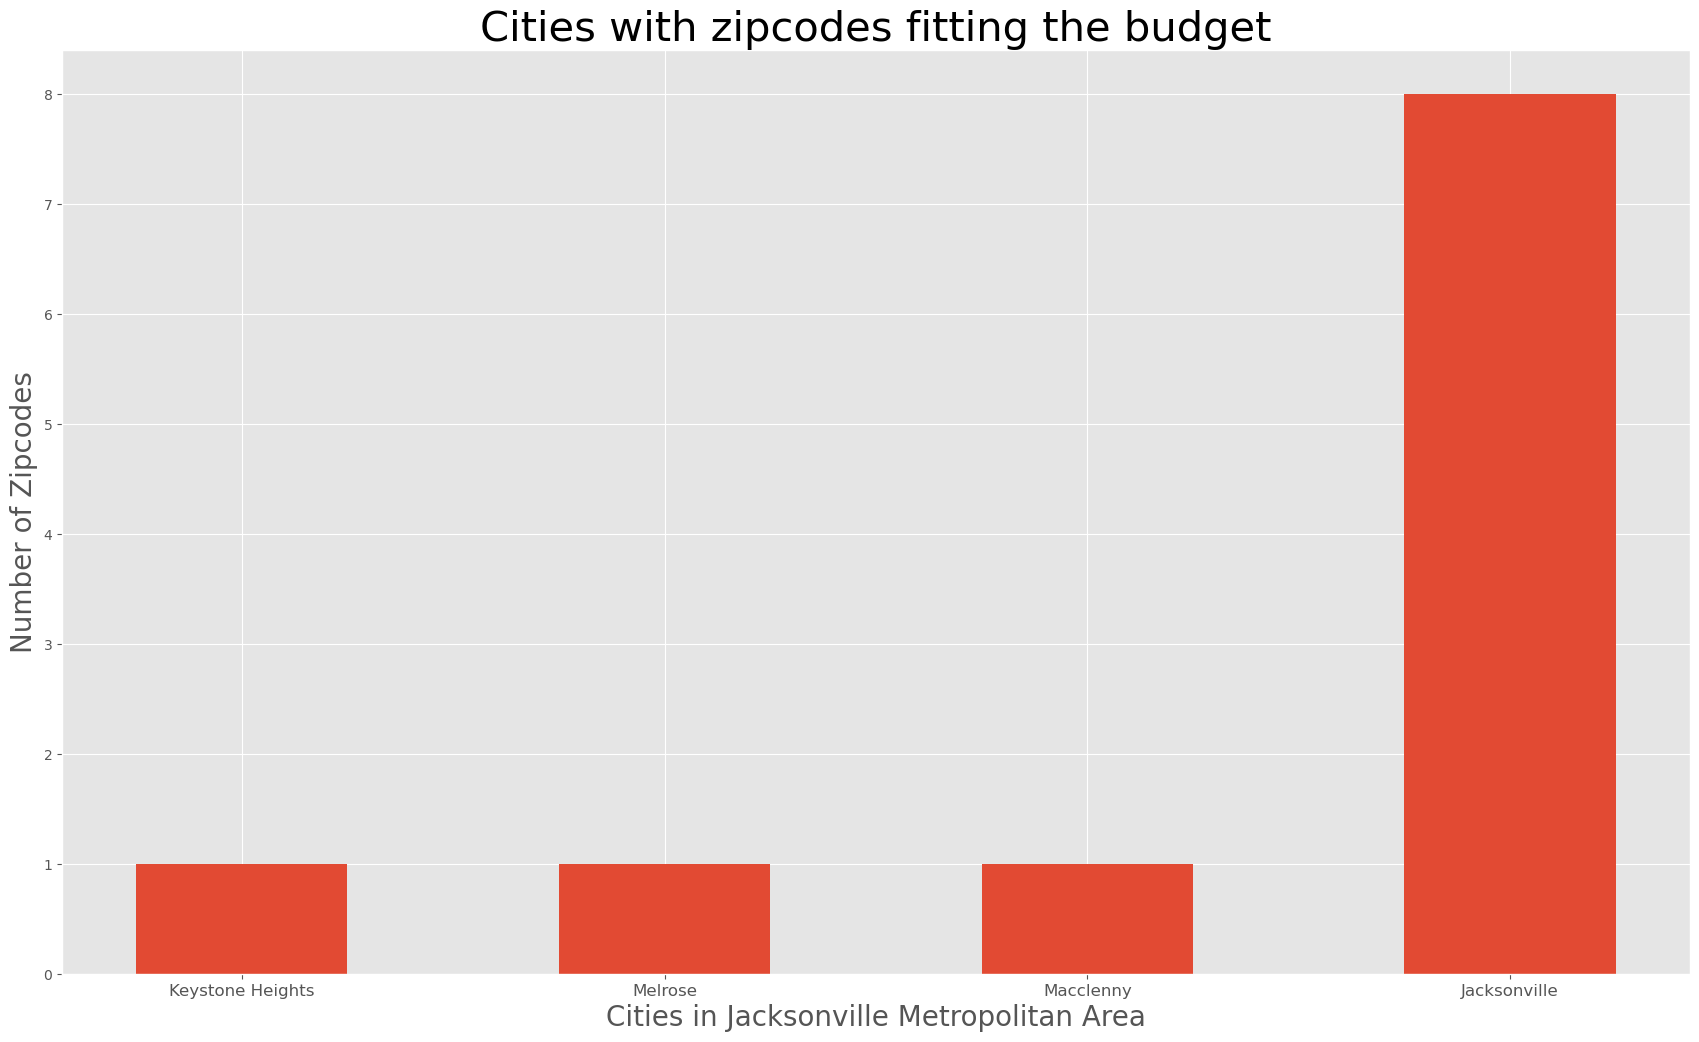

In [8]:
# Plotting number of zip codes in each city that fit this budget constraint.
from collections import Counter

city_names = []

for zip in jax_budget_zips:
    city_names.append(jax_budget[jax_budget['RegionName'] == zip].iloc[0]['City'])
    
count_dict = {}
for z in Counter(city_names).keys():
    count_dict[z] = Counter(city_names)[z]
 
count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1]))

#Building the bar chart
fig,ax = plt.subplots(figsize=(21,12))

x_labels = [a for a in count_dict.keys()]
x = list(range(1,len(x_labels)+1))
y = [a for a in count_dict.values()]

ax.bar(x,y,width=0.5)

ax.set_xticks(x)
ax.set_xticklabels(x_labels,fontsize='12')
ax.set_title("Cities with zipcodes fitting the budget",fontsize='30')
ax.set_ylabel("Number of Zipcodes",fontsize='20')
ax.set_xlabel("Cities in Jacksonville Metropolitan Area",fontsize='20');

### Visualizing the price history of these zip codes.

In [14]:
jax_budget.head()

,RegionID,SizeRank,RegionName,RegionType,State,City,Metro,CountyName,2000-01-31,2000-02-29,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
2,71895,346,32244,zip,FL,Jacksonville,"Jacksonville, FL",Duval County,84461.194955,84652.118712,...,272197.744873,271938.524676,270817.306700,269417.288669,268206.935444,267606.291227,267042.234733,266645.425844,266886.493624,267408.969364
8,71869,1985,32216,zip,FL,Jacksonville,"Jacksonville, FL",Duval County,84768.799103,84899.136820,...,276335.757328,276900.166579,276211.164093,274978.091637,274041.525634,273848.697370,273522.813256,273079.766888,272915.852979,272928.531459
10,71861,2372,32207,zip,FL,Jacksonville,"Jacksonville, FL",Duval County,79749.255922,79914.996538,...,277945.677828,278357.482017,277563.664665,276657.956952,276349.194220,276620.374126,276277.560757,275683.177061,275855.173577,276602.249044
14,71910,3198,32277,zip,FL,Jacksonville,"Jacksonville, FL",Duval County,103122.309424,103355.556563,...,286890.938835,286657.213427,285703.226621,284724.334934,284212.868115,284594.994483,284980.456447,285504.824531,286327.222716,287188.102730
16,71859,3921,32205,zip,FL,Jacksonville,"Jacksonville, FL",Duval County,71789.323663,72100.376097,...,271898.415045,272282.080097,271262.767479,270541.578987,269936.026284,269848.424917,269109.433258,268450.302167,268711.857008,269088.483398


In [15]:
del jax_budget['RegionType']

In [16]:
zip_dict = {}

for zipcode in jax_budget_zips:
    filtered_data = jax_budget[jax_budget['RegionName'] == zipcode]
    
    melted_data = pd.melt(filtered_data, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], 
                          var_name='time')
    
    melted_data['time'] = pd.to_datetime(melted_data['time'], infer_datetime_format=True)
    
    # Drop rows with missing 'value'
    melted_data = melted_data.dropna(subset=['value'])
    
    # Group and aggregate the data
    aggregated_data = melted_data.groupby('time').aggregate({'value':'mean'})
    
    # Store the aggregated data in the zip_dict dictionary
    zip_dict[zipcode] = aggregated_data


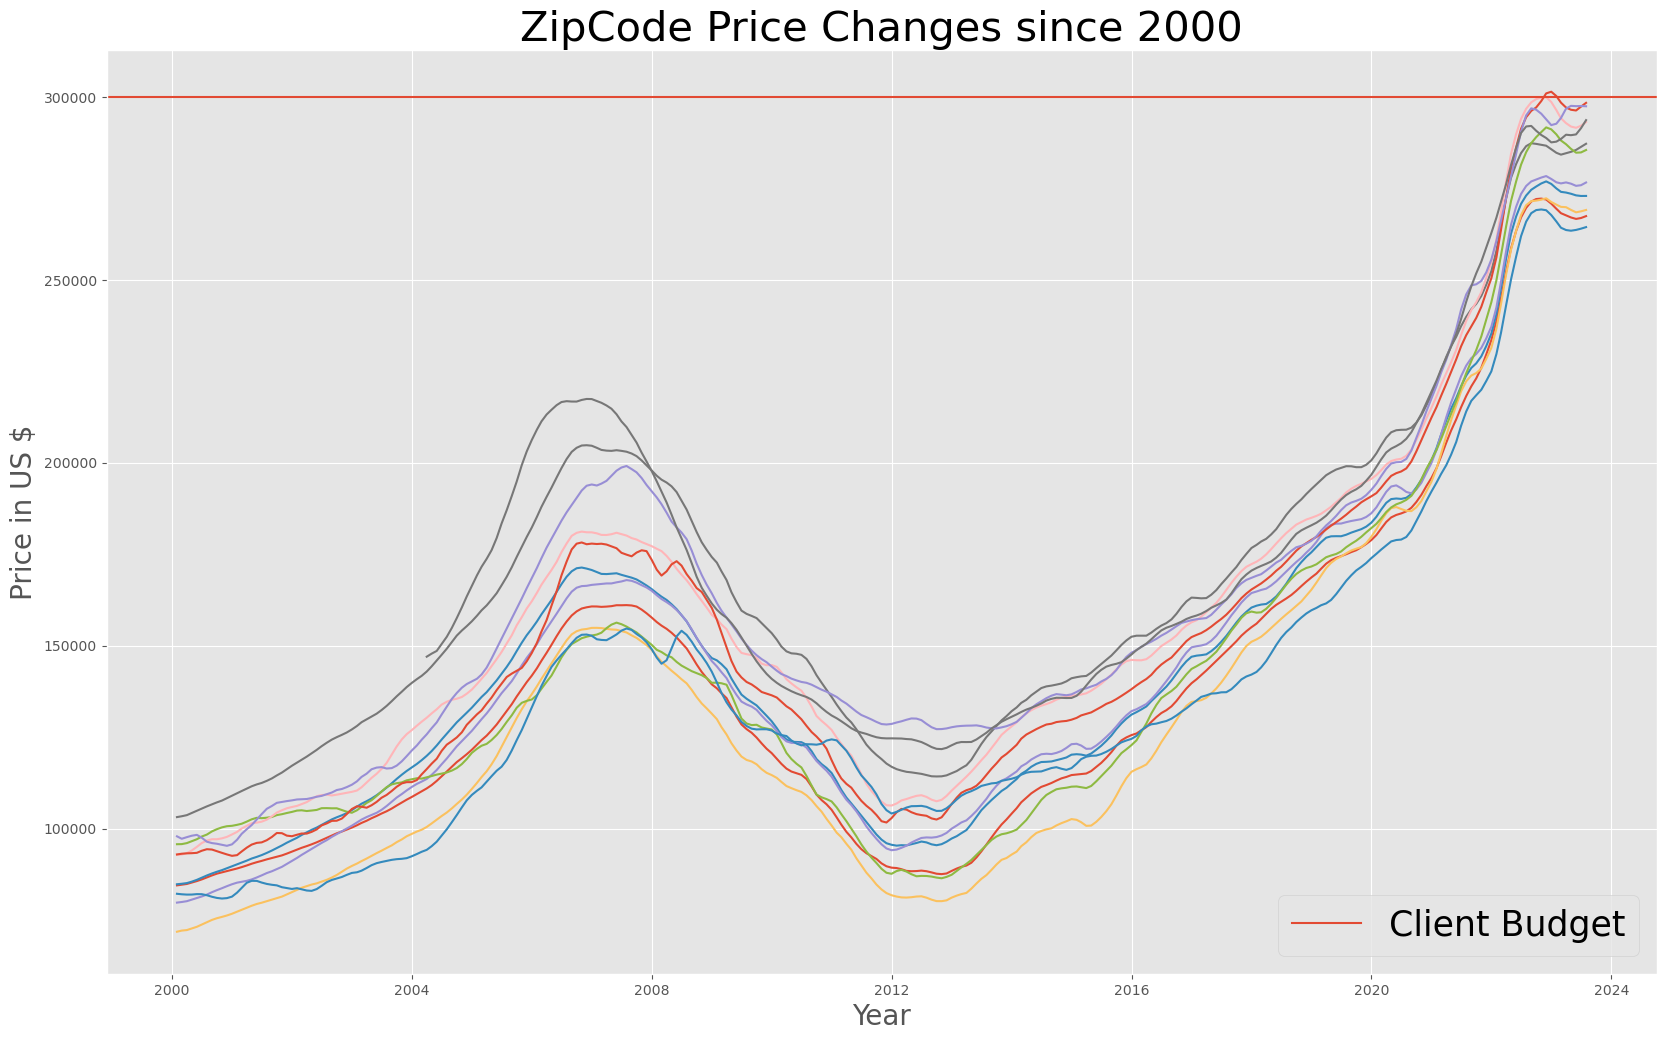

In [17]:
fig,ax = plt.subplots(figsize=(20,12))

for zipcode in zip_dict:
    ax.plot(zip_dict[zipcode],)

ax.axhline(y=300000,label = 'Client Budget')   

ax.set_title('ZipCode Price Changes since 2000',fontsize=30)
ax.set_ylabel('Price in US $',fontsize=20)
ax.set_xlabel('Year',fontsize=20)
ax.legend(prop={'size': 25});

You can clearly see the effects of recession in 2008 on the market. **A person who bought a house in 2006 would not make any profit in the house till 2020.**



### Average Price Growth since 2018

I am checking since 2018, because we happened to buy a house in 2018.

In [18]:
roi_2018 = jax_budget.groupby('RegionName').apply(lambda x: ((x['2023-07-31'] - x['2018-01-31']) / x['2018-01-31']) * 100)
roi_2018 = roi_2018.rename('roi').reset_index()
roi_2018.head(20)


,RegionName,level_1,roi
0,32063,135,71.496459
1,32205,16,77.377393
2,32207,10,67.851047
3,32216,8,69.608539
4,32219,25,79.530506
5,32220,26,69.493264
6,32234,27,79.537343
7,32244,2,71.405716
8,32277,14,61.761759
9,32656,53,85.144984


[Text(1, 0, '32063'),
 Text(2, 0, '32205'),
 Text(3, 0, '32207'),
 Text(4, 0, '32216'),
 Text(5, 0, '32219'),
 Text(6, 0, '32220'),
 Text(7, 0, '32234'),
 Text(8, 0, '32244'),
 Text(9, 0, '32277'),
 Text(10, 0, '32656'),
 Text(11, 0, '32666')]

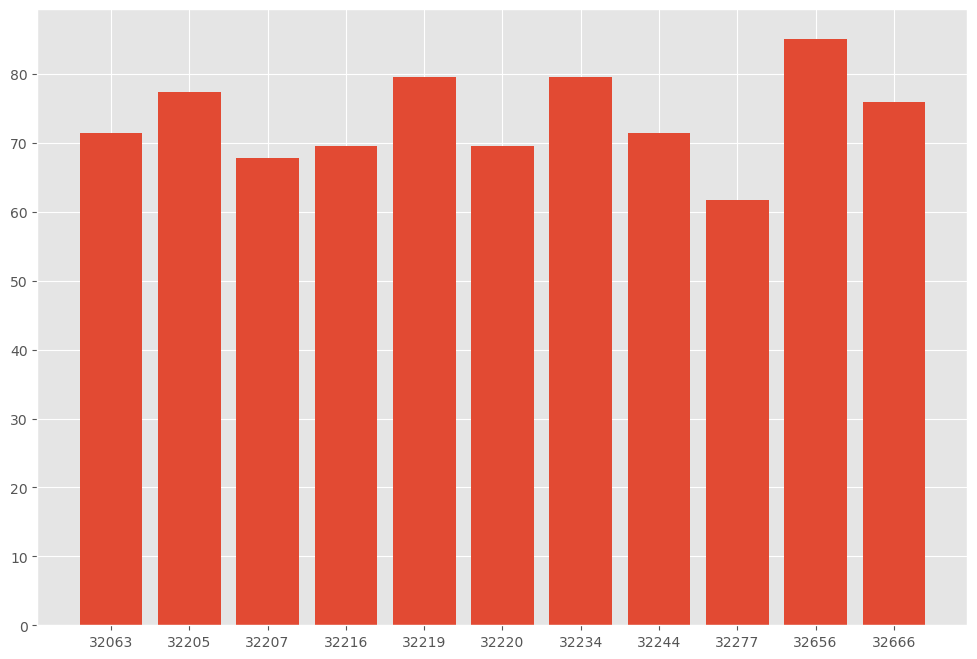

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

x_labels = [str(a) for a in roi_2018['RegionName']]
x = list(range(1,12))
y = [a for a in roi_2018['roi']]

ax.bar(x,y)

ax.set_xticks(x)
ax.set_xticklabels(x_labels)

### Selecting zip code 32205 to build our ARIMA prediction model.

In [20]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})



In [22]:
# melting the data to a time series.
zip32205 = jax[jax['RegionName'] == 32205]
    
melted = pd.melt(zip32205, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], 
                      var_name='time')
    
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
melted = melted.dropna(subset=['value'])

aggregated = melted.groupby('time').aggregate({'value':'mean'})
series32205 = aggregated
series32205

,value
time,
2000-01-31,71789.323663
2000-02-29,72100.376097
2000-03-31,72240.503070
2000-04-30,72691.207953
2000-05-31,73133.354922
...,...
2023-03-31,269848.424917
2023-04-30,269109.433258
2023-05-31,268450.302167


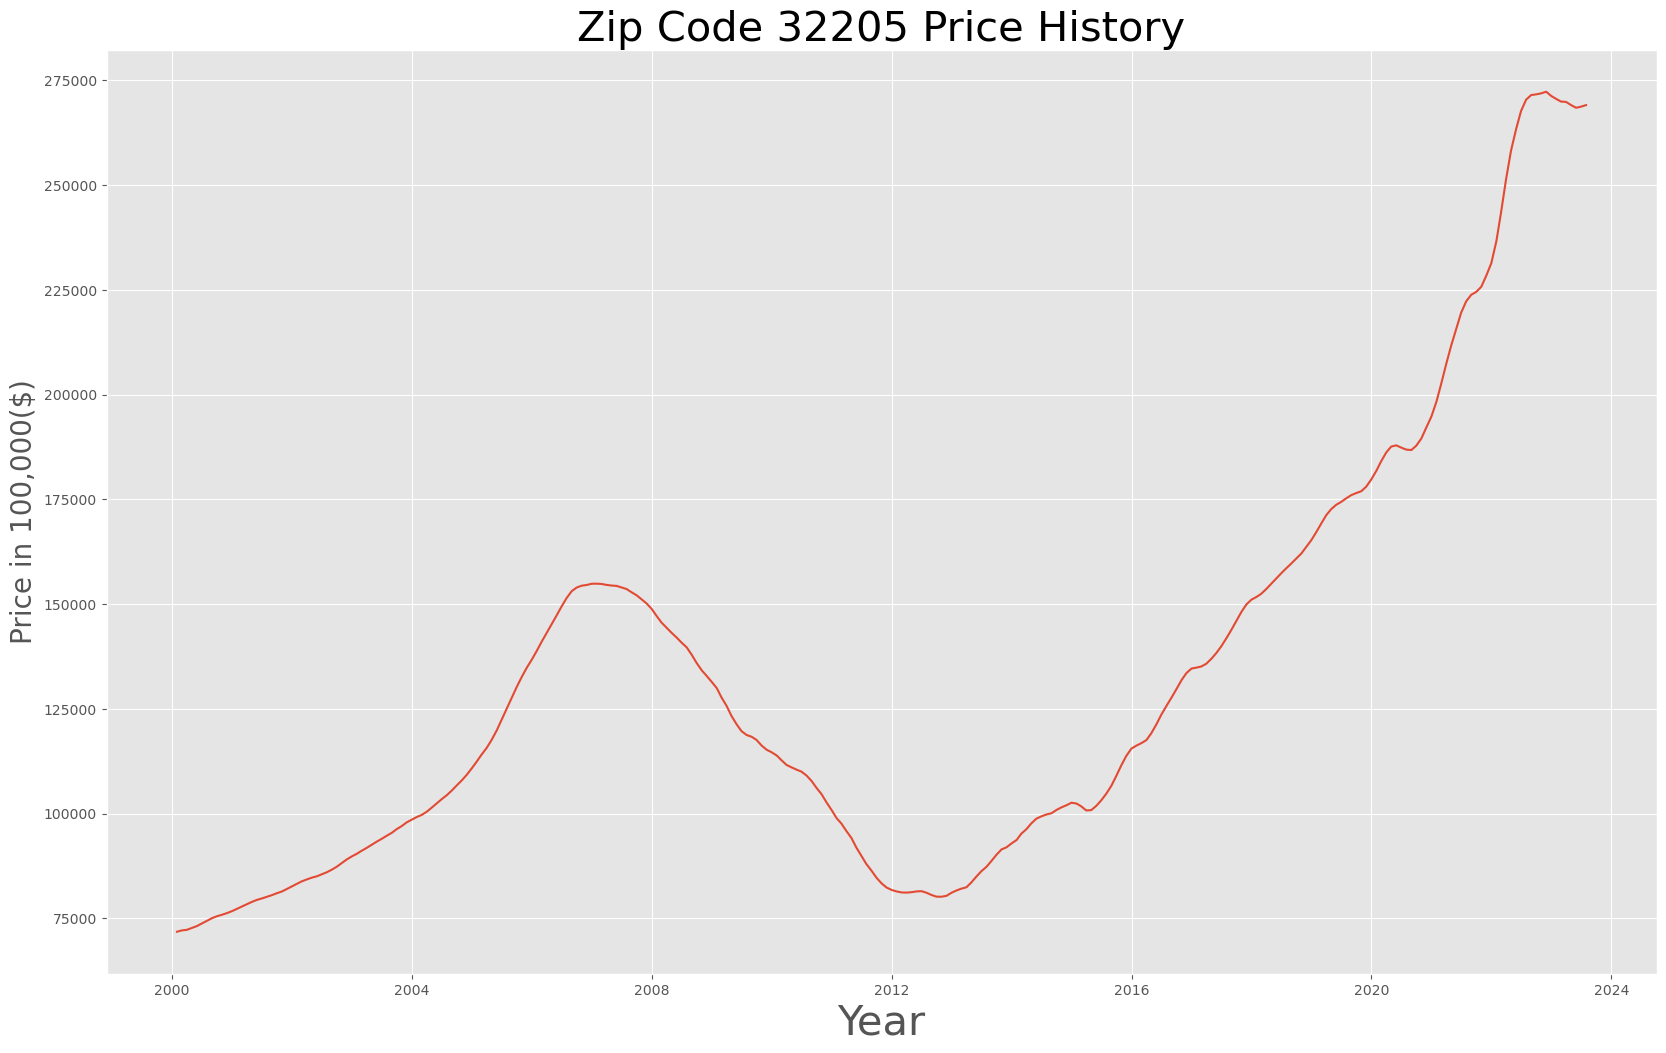

In [23]:
#Visualizing our Time Series Data for zipcode- 32205

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(series32205)

ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Price in 100,000($)',fontsize=20)
ax.set_title('Zip Code 32205 Price History',fontsize=30);

### Modelling

Since the data from 2007 - 2010 was not normal and was caused by very special circumstances. We will use data from 2011 to model and make predictions.

In [24]:
recent_series = series32205['2011':]
recent_series

,value
time,
2011-01-31,98861.240309
2011-02-28,97641.710268
2011-03-31,95829.517103
2011-04-30,94202.293922
2011-05-31,91856.880635
...,...
2023-03-31,269848.424917
2023-04-30,269109.433258
2023-05-31,268450.302167


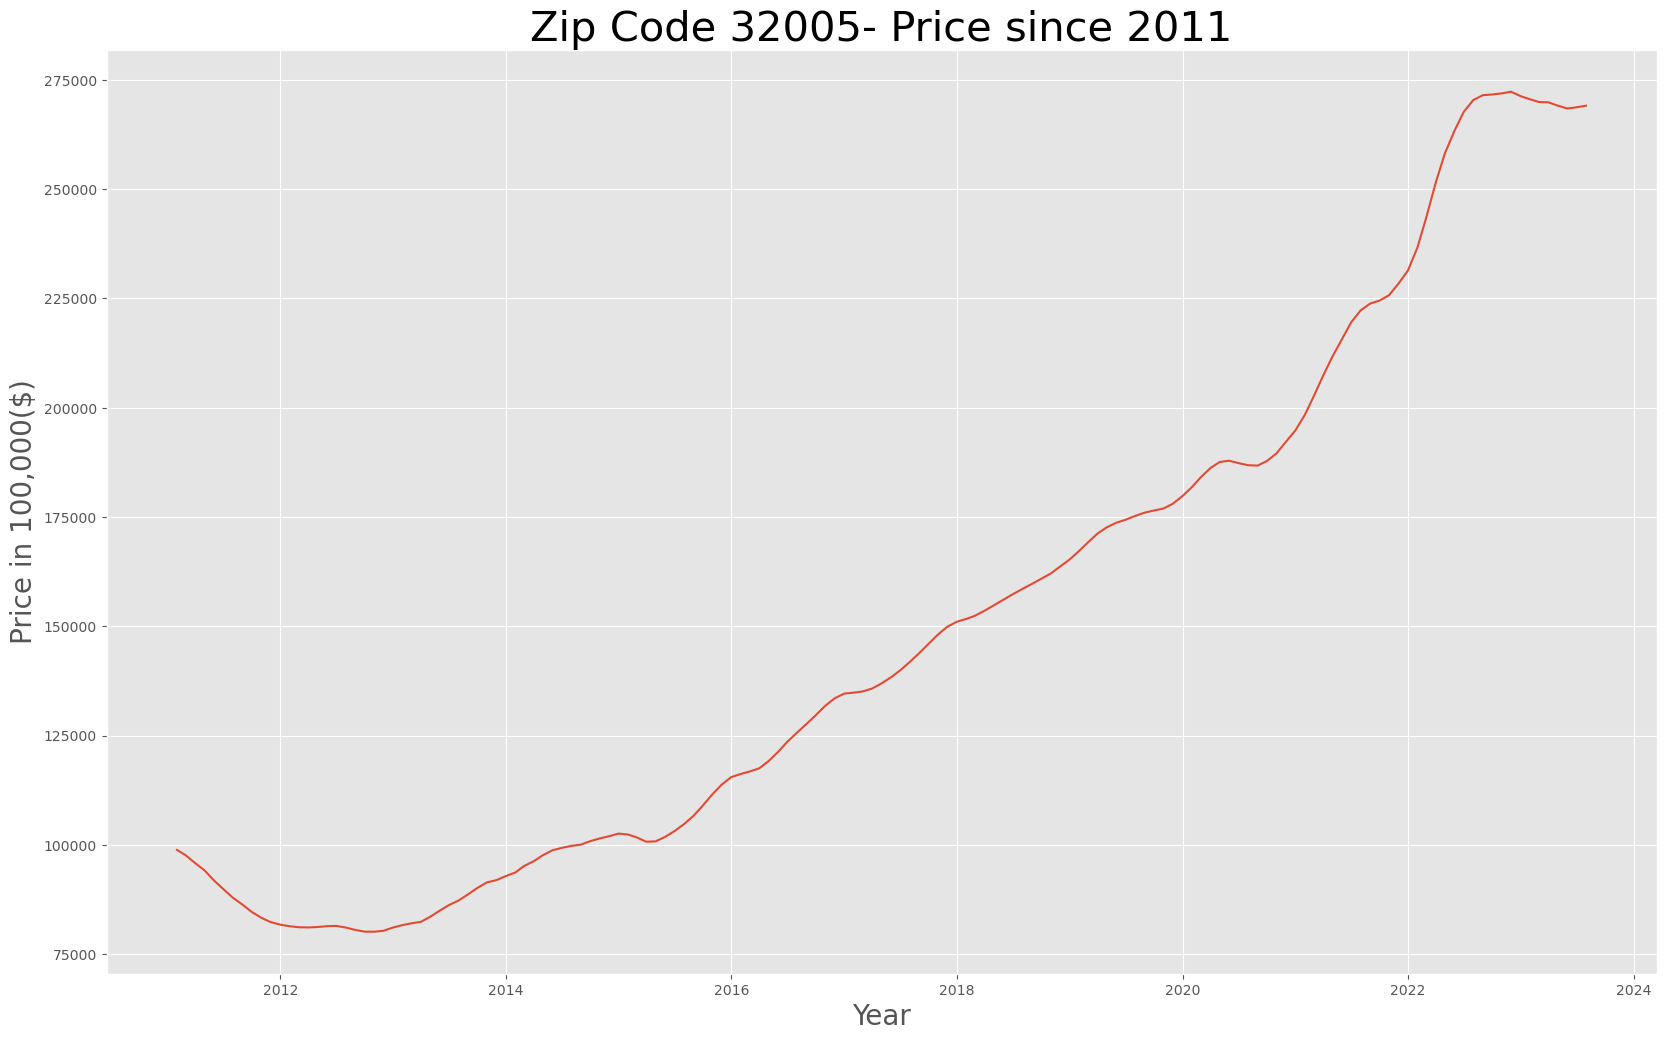

In [25]:
#Visualizing our Time Series Data for zipcode- 32205 from 2011

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(recent_series)

ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Price in 100,000($)',fontsize=20)
ax.set_title('Zip Code 32005- Price since 2011',fontsize=30);

In [26]:
train_series = recent_series[:'2017-12-31']
train_series

,value
time,
2011-01-31,98861.240309
2011-02-28,97641.710268
2011-03-31,95829.517103
2011-04-30,94202.293922
2011-05-31,91856.880635
...,...
2017-08-31,143859.260828
2017-09-30,145973.476813
2017-10-31,148131.515281


In [27]:
test_series = recent_series['2018-01-31':]
test_series

,value
time,
2018-01-31,151703.934502
2018-02-28,152427.959084
2018-03-31,153576.563033
2018-04-30,154821.536255
2018-05-31,156137.460805
...,...
2023-03-31,269848.424917
2023-04-30,269109.433258
2023-05-31,268450.302167


In [28]:
# running auto ARIMA to get p,d,q values
import pmdarima as pm

auto_model = pm.auto_arima(train_series['value'], start_p=0, start_q=0,
                           test='adf',
                           max_p=5, max_q=5,
                           m=1,
                           d=0,
                           seasonal=True,
                           start_P=0, start_Q=0,
                           D=0,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True, with_intercept=False)

print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2184.701, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2127.852, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1381.146, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2117.023, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.382 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -687.573
Date:        

In [29]:
#Identifying the order values for our model
auto_model.order

(1, 0, 1)

In [30]:
#Identifying the Seasonal Order values for our model
auto_model.seasonal_order

(0, 0, 0, 0)

/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95207D+00    |proj g|=  3.83161D-01

At iterate    5    f=  7.93507D+00    |proj g|=  5.65217D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     26      1     0     0   1.156D-02   7.935D+00
  F =   7.9350658985242690     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

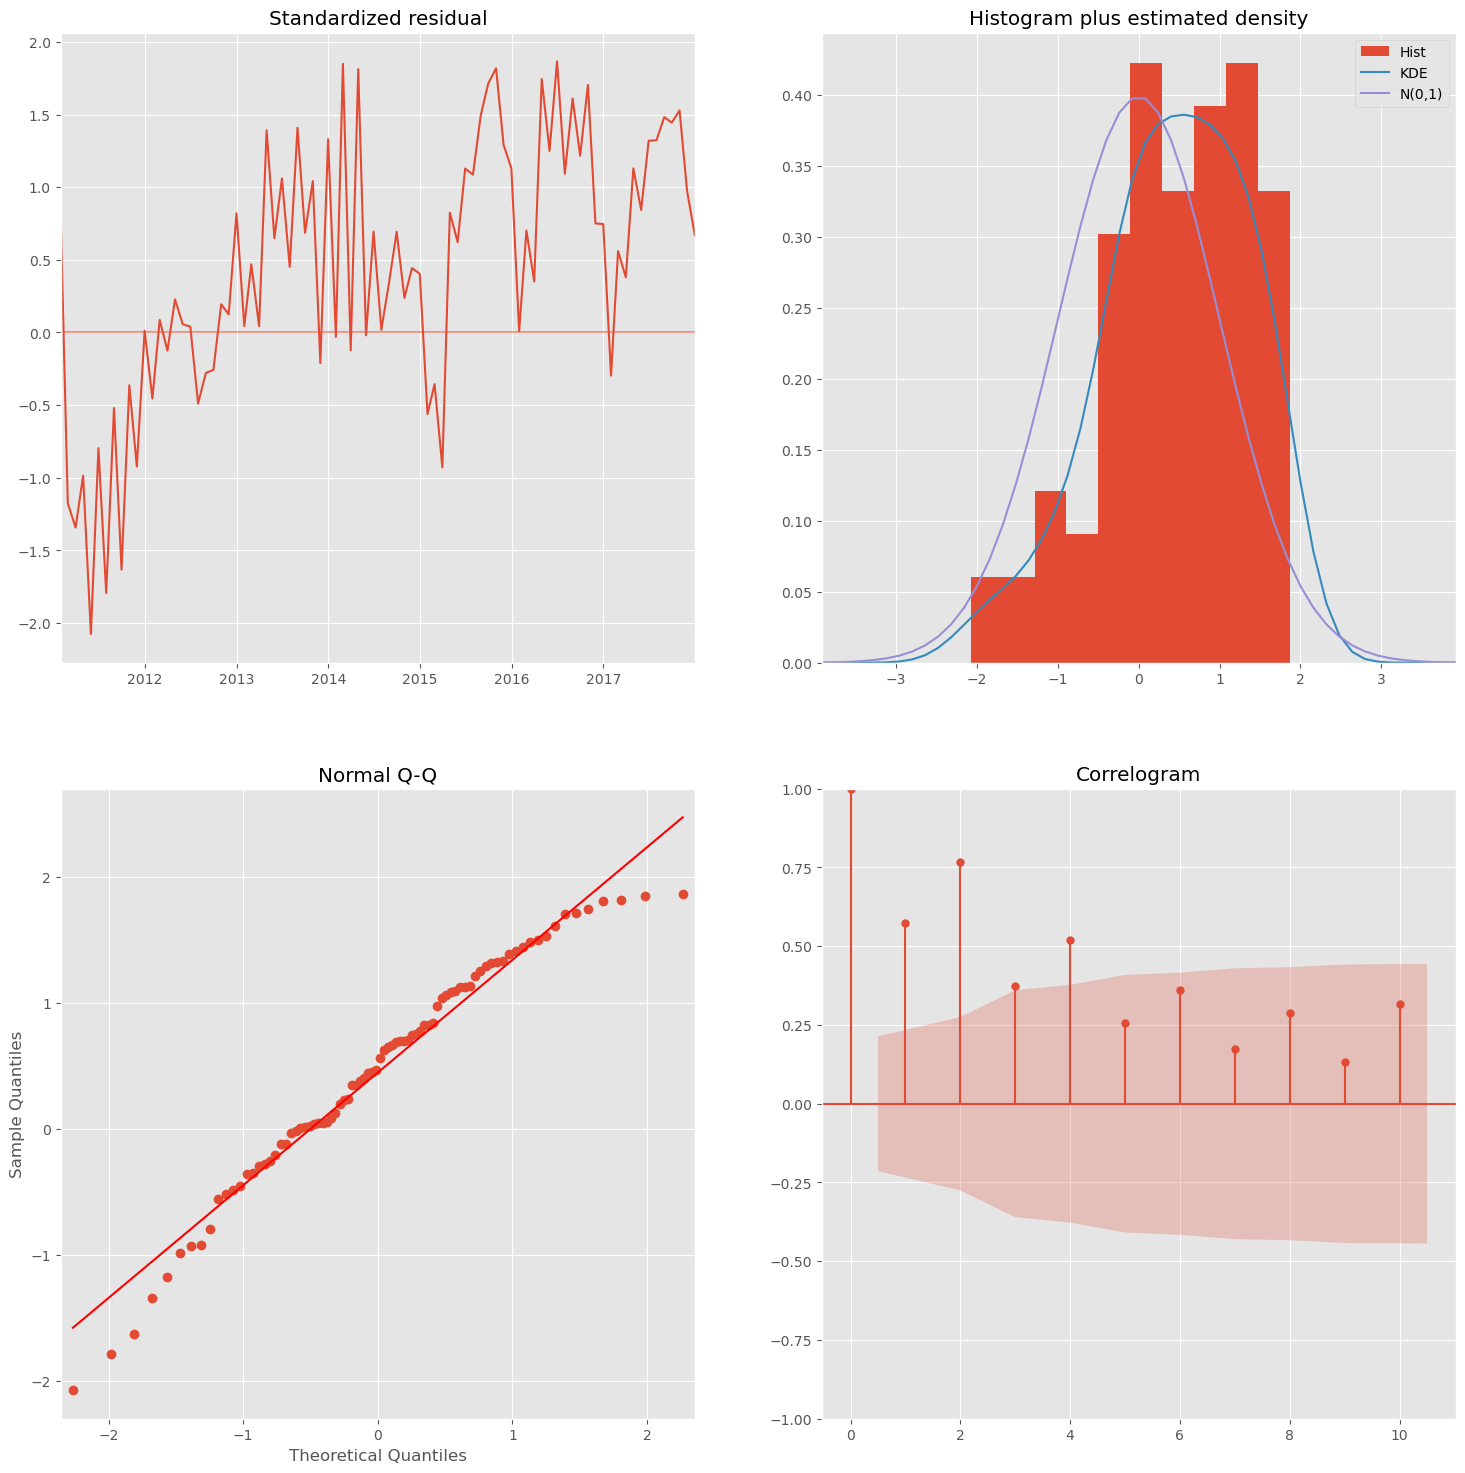

In [31]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = SARIMAX(train_series, 
                      order=(1, 0, 1), 
                      seasonal_order=(0, 0, 0, 0), 
                      enforce_stationarity=False, 
                      enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])
auto_model.plot_diagnostics(figsize=(18, 18))
plt.show()


In [32]:
# Get predictions starting from 04-01-2015 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2018-01-31'), end=pd.to_datetime('2023-07-31'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf

,lower value,upper value
2018-01-31,150032.089806,154266.623020
2018-02-28,148782.027417,157759.928387
2018-03-31,148396.670235,160405.065387
2018-04-30,148315.141835,162763.032351
2018-05-31,148405.651989,164965.742313
...,...,...
2023-03-31,200179.840588,279629.007039
2023-04-30,201461.073758,281884.850376
2023-05-31,202754.097359,284154.978061
2023-06-30,204058.948326,286439.545380


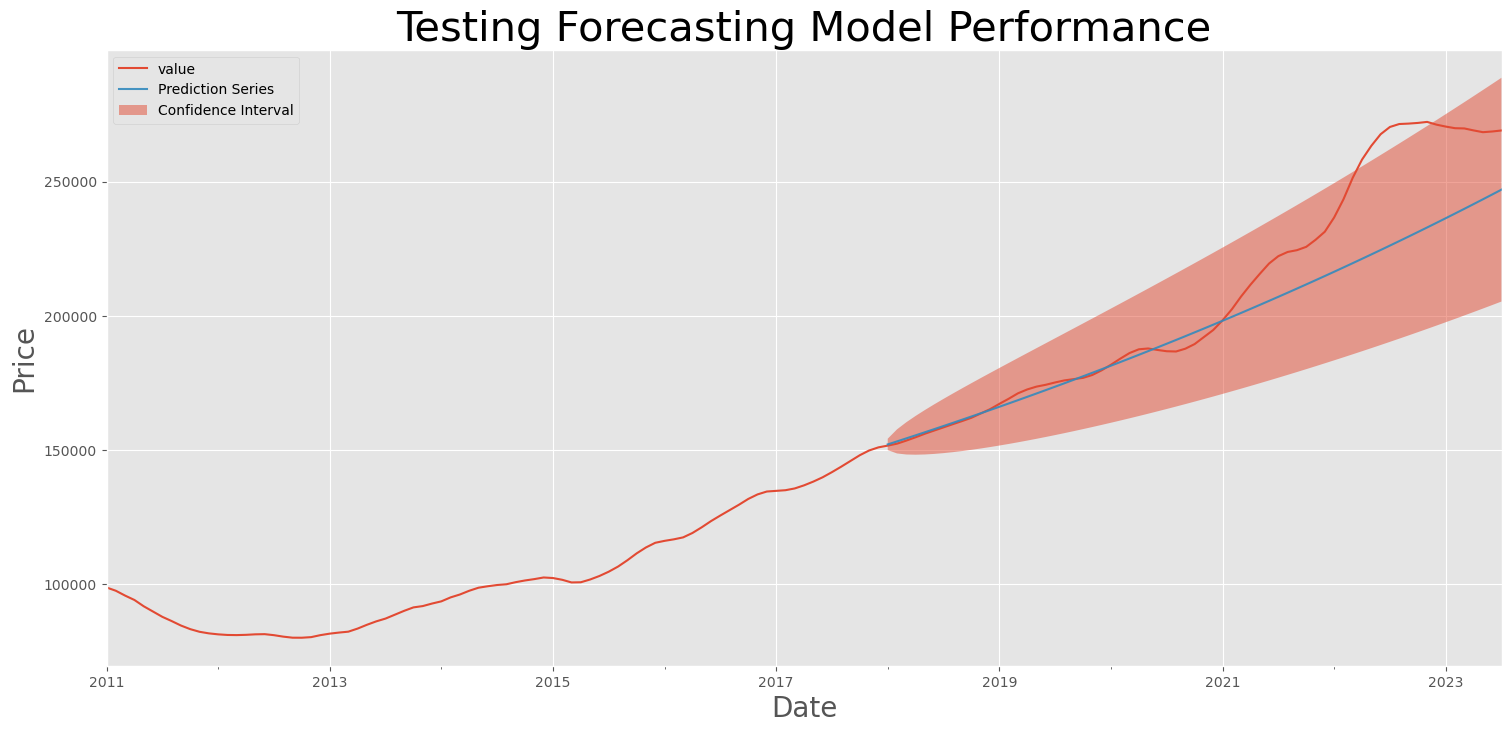

In [33]:
# Plot real vs predicted values along with confidence interval
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 8

# Plot observed values
ax = recent_series.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], alpha=0.5,label = 'Confidence Interval')

# Set axes labels
ax.set_xlabel('Date',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
ax.set_title('Testing Forecasting Model Performance',fontsize=30)
plt.legend()

plt.show()

### Price forecasting for 32205.

In [34]:
# Plug the parameter values from our Auto ARIMA model into a new SARIMAX model that fits the entire series.
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(recent_series, 
                                        order=(1,0,1), 
                                        seasonal_order=(0, 0, 0, 0), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
full_output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41724D+00    |proj g|=  5.44285D-01

At iterate    5    f=  8.28918D+00    |proj g|=  9.64424D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     34      1     0     0   2.775D-03   8.289D+00
  F =   8.2891698861980938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [35]:
## Getting a forecast for the next 36 months after the last recorded date on our dataset.
forecast = full_output.get_forecast(36)
future_prediction = forecast.conf_int()
future_prediction['value'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction'] 
future_prediction

,lower,upper,prediction
2023-08-31,268059.861844,273580.857764,270820.359804
2023-09-30,267110.173170,278918.241220,273014.207195
2023-10-31,267317.731905,283133.920876,275225.826391
2023-11-30,267933.356400,286977.366311,277455.361355
2023-12-31,268782.480928,290623.433512,279702.957220
2024-01-31,269790.497915,294147.022668,281968.760292
2024-02-29,270917.403090,297588.433034,284252.918062
2024-03-31,272138.847769,300972.310667,286555.579218
2024-04-30,273438.744606,304315.042696,288876.893651
2024-05-31,274805.833333,307628.191600,291217.012467


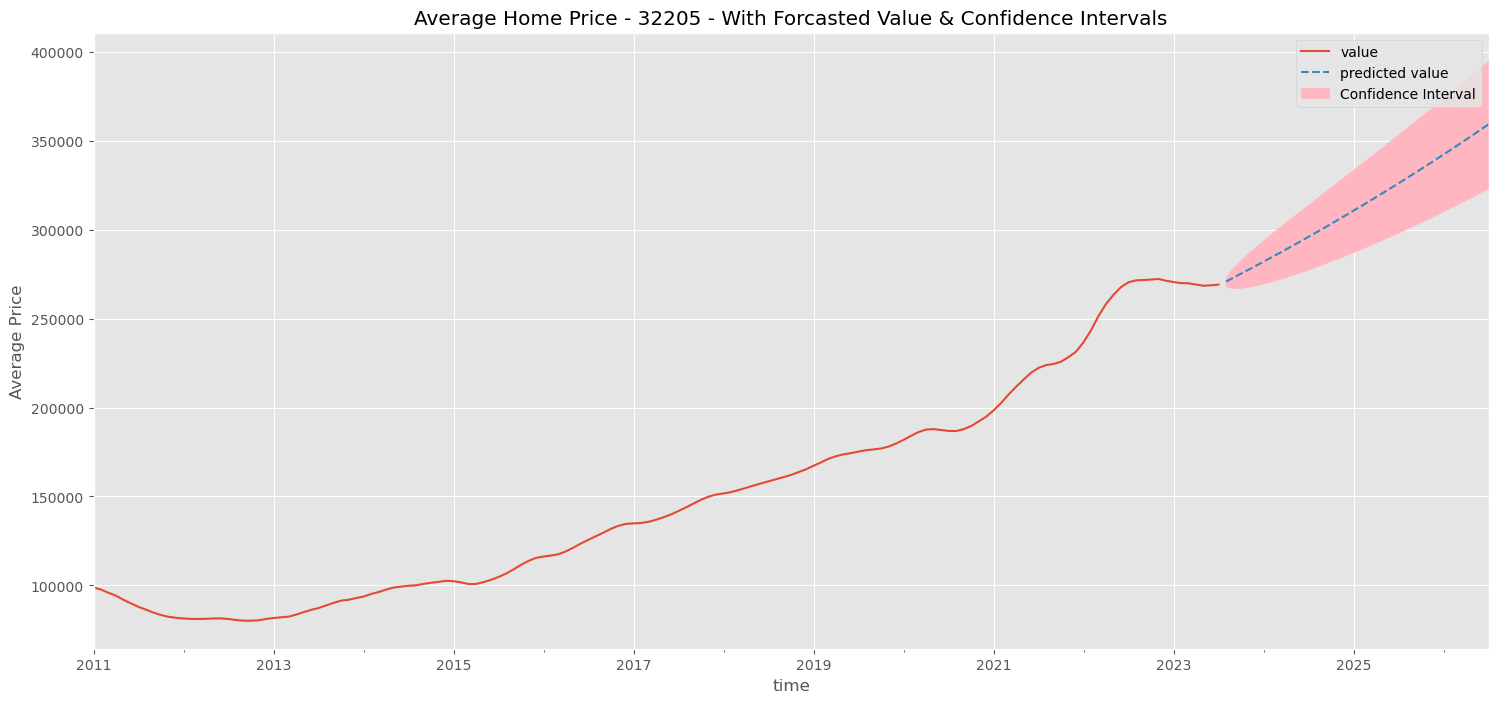

In [36]:
#Plotting our Forecast

fig, ax = plt.subplots()
recent_series.plot(ax=ax,label='Real Values')


future_prediction['prediction'].plot(ax=ax,label='predicted value',ls='--')

ax.fill_between(x= future_prediction.index, y1= future_prediction['lower'], 
                y2= future_prediction['upper'],color='lightpink',
                label='Confidence Interval')
ax.legend() 
plt.ylabel("Average Price")
plt.title('Average Home Price - 32205 - With Forcasted Value & Confidence Intervals')
plt.show()

### Making predictions for all zip codes and calculating return on investment.

In [37]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], 
                      var_name='time')
    
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [38]:
zip_predictions = {}

#miami_budget_zips is a list of zipcodes in Jax County with average price under $300000
for zipcode in jax_budget_zips:
    
    series = melt_data(jax[jax['RegionName'] == zipcode])
    
    #Only taking data from 2011 onwards to more accurately reflect current market conditions
    recent_series = series['2011':]
    
    # Splitting the last 36 months of our series as a test dataset.
    train_series = recent_series[:'2017-12-31']
    test_series = recent_series['2018-01-31':]
    print(test_series)
    #Auto ARIMA model
    auto_model = pm.auto_arima(train_series, start_p=0, start_q=0,
                     test='adf',
                     max_p=5, max_q=5,
                     m=1,
                     d=0,
                     seasonal = True,
                     start_P=0,start_Q=0,
                     D=0,
                     trace=True,
                     error_action= 'ignore',
                     suppress_warnings=True,
                     stepwise=True,with_intercept=False)
   
#Plug the optimal parameter values for our Training data into a SARIMAX model that fits our entire series.
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(recent_series, 
                                            order= auto_model.order, 
                                            seasonal_order= auto_model.seasonal_order, 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    ## Getting a forecast for the next 36 months after the last absrecorded date on our dataset.
    forecast = output.get_forecast(36)
    prediction = forecast.conf_int()
    prediction['value'] = forecast.predicted_mean
    print("###################")
    print(forecast.predicted_mean)
    prediction.columns = ['lower','upper','prediction']
    
    #Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[zipcode] = ((prediction['prediction'][-1])
                                - (series['value'][-1]))/ (series['value'][-1])
    

                    value
time                     
2018-01-31  156009.364701
2018-02-28  157274.025748
2018-03-31  158702.425605
2018-04-30  160036.953516
2018-05-31  161143.119580
...                   ...
2023-03-31  267606.291227
2023-04-30  267042.234733
2023-05-31  266645.425844
2023-06-30  266886.493624
2023-07-31  267408.969364

[67 rows x 1 columns]
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2197.451, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2140.897, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1349.815, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2130.560, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] inte

/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2150.155, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1364.542, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2139.551, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1603.015, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.415 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38444D+00    |proj g|=  5.48429D-01

At iterate    5    f=  8.13210D+00    |proj g|=  7.02827D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of s

/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2209.116, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2152.489, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1375.172, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1298.315, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2141.832, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2141.707, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1487.682, Time=0.08 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 0.641 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at 

/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


###################
2023-08-31    278150.725398
2023-09-30    279765.213518
2023-10-31    281817.880285
2023-11-30    283885.607685
2023-12-31    285968.506217
2024-01-31    288066.687195
2024-02-29    290180.262747
2024-03-31    292309.345826
2024-04-30    294454.050210
2024-05-31    296614.490516
2024-06-30    298790.782199
2024-07-31    300983.041563
2024-08-31    303191.385765
2024-09-30    305415.932820
2024-10-31    307656.801610
2024-11-30    309914.111890
2024-12-31    312187.984293
2025-01-31    314478.540337
2025-02-28    316785.902431
2025-03-31    319110.193883
2025-04-30    321451.538906
2025-05-31    323810.062623
2025-06-30    326185.891076
2025-07-31    328579.151233
2025-08-31    330989.970990
2025-09-30    333418.479186
2025-10-31    335864.805601
2025-11-30    338329.080971
2025-12-31    340811.436987
2026-01-31    343312.006311
2026-02-28    345830.922574
2026-03-31    348368.320391
2026-04-30    350924.335362
2026-05-31    353499.104084
2026-06-30    356092.764154


/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2117.023, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.444 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41724D+00    |proj g|=  5.44285D-01


/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f=  8.28918D+00    |proj g|=  9.64424D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     34      1     0     0   2.775D-03   8.289D+00
  F =   8.2891698861980938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
###################
2023-08-31    270820.359804
2023-09-30    273014.207195
2023-10-31    275225.826391
2023-11-30    277455.361355
2023-12-31    279702.957220
2024-01-31    281968.760292
2024-02-29    284252.918062
2024-03-31    286555.579218
2024-04-30    288876.893651
2024-05-31    291217.012467
2024-06-30    293576.087994
2024-07-31    295954.273797
2024-

/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1285.824, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2156.215, Time=0.01 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2156.064, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 0.641 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52798D+00    |proj g|=  1.36275D+00

At iterate    5    f=  8.42682D+00    |proj g|=  1.56272D+01

At iterate   10    f=  8.00903D+00    |proj g|=  2.83870D+00

At iterate   15    f=  7.98087D+00    |proj g|=  3.38293D+00

At i

/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2149.957, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.517 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38357D+00    |proj g|=  5.73626D-01

At iterate    5    f=  8.14850D+00    |proj g|=  1.08879D+00

At iterate   10    f=  8.14509D+00    |proj g|=  9.42398D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipp

/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1331.882, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2136.054, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.575 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.43673D+00    |proj g|=  5.50820D-01

At iterate    5    f=  8.18697D+00    |proj g|=  9.16588D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates 

/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1228.882, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2163.392, Time=0.01 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1202.963, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2162.070, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2163.920, Time=0.03 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 0.935 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75620D+00    |proj g|=  8.42357D-0

/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1297.046, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1231.099, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2162.627, Time=0.01 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1185.560, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2161.850, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2163.525, Time=0.03 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 0.847 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the b

/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ellietripathi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


/var/folders/gw/w91jngyn5jj1gy9xk_4wxqjc0000gn/T/ipykernel_6905/3516375214.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(a)+'%' for a in list(range(0,75,5))])


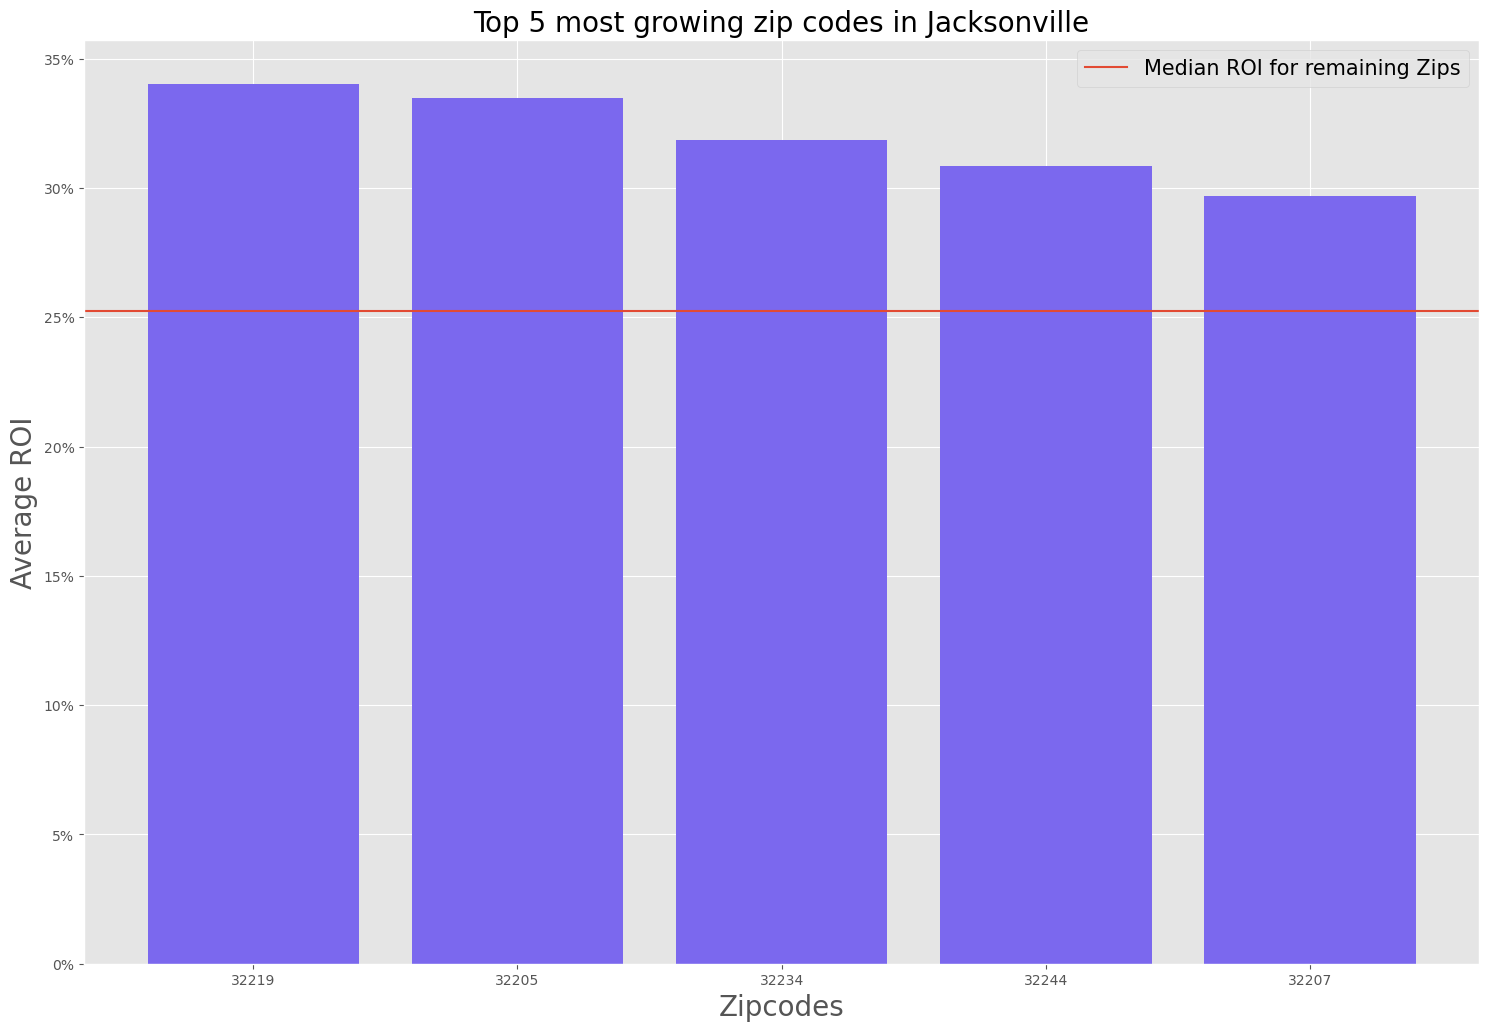

In [39]:
# Sorting our 3 year ROI forecast for zipcodes into descending order
sort_orders = sorted(zip_predictions.items(), key=lambda x: x[1], reverse=True)

sorted_forecast_3yr = {}
for i in sort_orders:
    sorted_forecast_3yr[i[0]] = i[1]
sorted_forecast_3yr

#Selecting only the Top 5 Zips
top_5_zipcodes = list(sorted_forecast_3yr.items())[:5]
top_5_zipcodes

fig, ax = plt.subplots(figsize=(18,12))

x_labels = [top_5_zipcodes[0][0],top_5_zipcodes[1][0],top_5_zipcodes[2][0],
            top_5_zipcodes[3][0],top_5_zipcodes[4][0]]
x = [1,2,3,4,5]
y = [top_5_zipcodes[0][1],top_5_zipcodes[1][1],top_5_zipcodes[2][1],
     top_5_zipcodes[3][1],top_5_zipcodes[4][1]]

ax.bar(x, y, color='mediumslateblue')
remaining_zipcodes = list(sorted_forecast_3yr.items())[5:]
median_ROI_other_zips = remaining_zipcodes[5][1]
ax.axhline(y=median_ROI_other_zips,label = 'Median ROI for remaining Zips')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_yticklabels([str(a)+'%' for a in list(range(0,75,5))])
ax.set_title('Top 5 most growing zip codes in Jacksonville', fontsize=20)
ax.set_ylabel('Average ROI', fontsize=20)
ax.set_xlabel('Zipcodes',fontsize=20)
ax.legend(prop={'size': 15});

In [40]:
print(f"The Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[:1][0][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[:1][0][1]) * 100, 2)}% over the next 3 years.")


The Highest Growing Zipcode: 32219 is expected to grow by 34.03% over the next 3 years.


In [41]:
print(f'The Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[0][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[0][1])*100,2)}%')
print(f'The Second Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[1][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[1][1])*100,2)}%')
print(f'The Third Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[2][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[2][1])*100,2)}%')
print(f'The Fourth Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[3][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[3][1])*100,2)}%')
print(f'The Fifth Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[4][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[4][1])*100,2)}%')


The Highest Growing Zipcode: 32219 is expected to grow by 34.03%
The Second Highest Growing Zipcode: 32205 is expected to grow by 33.48%
The Third Highest Growing Zipcode: 32234 is expected to grow by 31.87%
The Fourth Highest Growing Zipcode: 32244 is expected to grow by 30.85%
The Fifth Highest Growing Zipcode: 32207 is expected to grow by 29.68%
